# Projet Deep Learning

## Imports

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import json
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, Xception
from tensorflow.keras.optimizers import Adam
import subprocess

In [2]:
# Vérifier la version de TensorFlow
print("TensorFlow version:", tf.__version__)

# Téléchargement et extraction des données
data_dir = 'Fish.v1-416x416.tensorflow'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

# Analyse exploratoire des données (EDA)
num_train_images = len(os.listdir(train_dir))
num_test_images = len(os.listdir(test_dir))
num_valid_images = len(os.listdir(valid_dir))

print("Nombre d'images dans le dossier d'entraînement:", num_train_images)
print("Nombre d'images dans le dossier de test:", num_test_images)
print("Nombre d'images dans le dossier de validation:", num_valid_images)


TensorFlow version: 2.15.0
Nombre d'images dans le dossier d'entraînement: 945
Nombre d'images dans le dossier de test: 137
Nombre d'images dans le dossier de validation: 271


Exemples d'images dans le dossier d'entraînement:


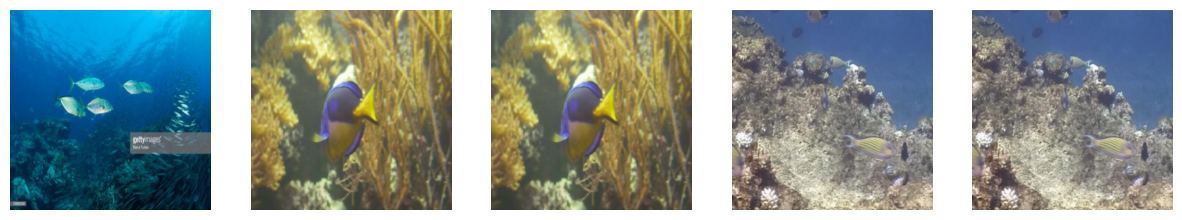

Exemples d'images dans le dossier de test:


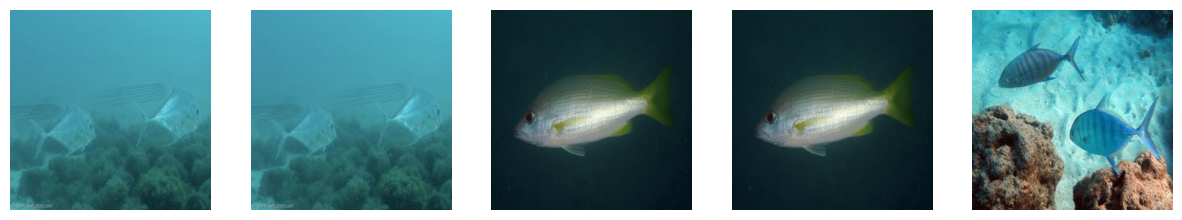

Exemples d'images dans le dossier de validation:


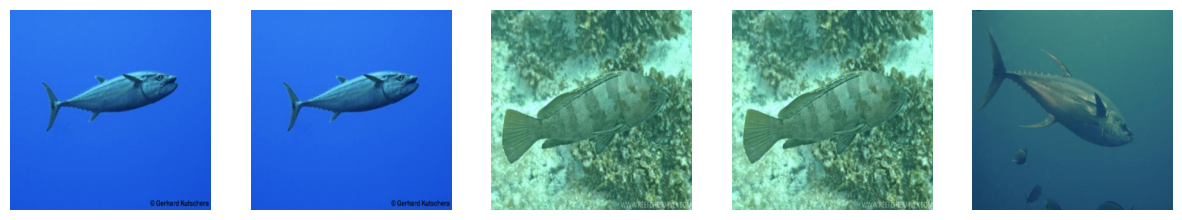

In [3]:
def display_images(directory, num_images=5):
    images = os.listdir(directory)
    num_images = min(num_images, len(images))

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        img_path = os.path.join(directory, images[i])
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

# Afficher des exemples d'images pour chaque ensemble de données
print("Exemples d'images dans le dossier d'entraînement:")
display_images(train_dir)

print("Exemples d'images dans le dossier de test:")
display_images(test_dir)

print("Exemples d'images dans le dossier de validation:")
display_images(valid_dir)


## 1. Classification

In [4]:
def crop_images(initial_directory, destination):
    # Charger les annotations à partir du fichier CSV
    annotations_file = '_annotations.csv'
    annotations_df = pd.read_csv(os.path.join(initial_directory, annotations_file))

    # Parcourir les annotations
    for index, row in annotations_df.iterrows():
        # Charger l'image correspondante
        image_path = os.path.join(initial_directory, row['filename'])
        image = cv2.imread(image_path)

        # Vérifier si l'image a été chargée avec succès
        if image is None:
            print(f"Impossible de charger l'image: {image_path}")
            continue

        # Récupérer les coordonnées du rectangle annoté
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])

        # Cropper l'image selon le rectangle annoté
        cropped_image = image[ymin:ymax, xmin:xmax]

        # Vérifier si l'image croppée est valide
        if cropped_image.size == 0 or cropped_image.shape[0] == 0 or cropped_image.shape[1] == 0:
            print(f"Image croppée invalide pour l'image: {image_path}")
            continue

        # Trouver la classe annotée (l'espèce de poisson)
        class_name = row['class']

        # Préparer le dossier de sauvegarde
        save_dir = os.path.join(destination, class_name)
        os.makedirs(save_dir, exist_ok=True)

        # Construire un nom de fichier unique pour éviter les écrasements
        base_filename, file_extension = os.path.splitext(row['filename'])
        unique_filename = f"{base_filename}_{index}{file_extension}"
        save_path = os.path.join(save_dir, unique_filename)

        # Sauvegarder l'image croppée
        cv2.imwrite(save_path, cropped_image)
        print(f"Image croppée et sauvegardée: {save_path}")

crop_images(train_dir, "cropped_train_images")
crop_images(test_dir, "cropped_test_images")
crop_images(valid_dir, "cropped_valid_images")

Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset232_png.rf.CC8AfGJBFvbo9JTlNPe4_0.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset232_png.rf.CC8AfGJBFvbo9JTlNPe4_1.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_2.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_3.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_4.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_5.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_6.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_7.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_8.jpg
Image croppée et sauvegardée: c

Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_90.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_91.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_92.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_93.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_94.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_95.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_96.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_97.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_98.jpg
Image croppée et sauvegardée

Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset678_png.rf.HhDvrjK8Pzz65icMaJV4_175.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset678_png.rf.HhDvrjK8Pzz65icMaJV4_176.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset634_png.rf.JjLA2hHXYJFG29q8AJM1_177.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset166_png.rf.IQfhR4Ly2Guw1va593LK_178.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset166_png.rf.IQfhR4Ly2Guw1va593LK_179.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset729_png.rf.IIoVuWWu0evamzi8sWLt_180.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset423_png.rf.J7WaKqQZviWy1rE3aBrE_181.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset571_png.rf.IQhyz4bfcBeyEgzdvozi_182.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset155_png.rf.HHtIZBa0RVYHhAbV56hX_183.jpg
Image croppée et sauveg

Image croppée et sauvegardée: cropped_train_images\jack\FishDataset457_png.rf.Nv5CGscWT2BVsvyN50zP_253.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset190_png.rf.LGN4IBpqePh377HPQNhj_254.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_255.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_256.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_257.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_258.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_259.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_260.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_261.jpg
Image croppée et sauvegardée: 

Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_338.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_339.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_340.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_341.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_342.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset305_png.rf.NPRu0woZcToW8RjVKyZX_343.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset192_png.rf.TIR0qqw2yhDHjx02hHNF_344.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset29_png.rf.TH77nCqIkAUqcKHyqkvC_345.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset608_png.rf.UWmPx0vYDzr50WcfWBdG_346.jpg
Image croppée 

Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset353_png.rf.a3462b07e0222194dba17bf088cc86f5_421.jpg
Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset542_png.rf.a476f69e8be4b461262b4870f316a299_422.jpg
Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset343_png.rf.a3d72480eeadda2c7de8209579bd695b_423.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset691_png.rf.a15aa0b4aeaed9e4dd7383c02ade32ad_424.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset218_png.rf.a43441767febfc23a054119387d6c529_425.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset437_png.rf.a672a93409e9342b919337a5a9247573_426.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset437_png.rf.a672a93409e9342b919337a5a9247573_427.jpg
Image croppée et sauvegardée: cropped_train_images\

Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_502.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset611_png.rf.b43a283742bd3dc0e8b99bfd885dfd4d_503.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset449_png.rf.b4766c5a3057091babc837225f915021_504.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset449_png.rf.b4766c5a3057091babc837225f915021_505.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset512_png.rf.aU56dWM1eU3Kx45NBk9c_506.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset199_png.rf.b42b89fda0229f2540a48e165ba818d9_507.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset363_png.rf.b6MNx91kCOQpSVPUTjLA_508.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset695_png.rf.b176b64ff7834c2b836724259ff260a1_509

Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset680_png.rf.06759189035e1cff7cd23f22939ef39d_577.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset481_png.rf.0482037299a4788e2a5fecb9bea43c18_578.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset349_png.rf.0791b6dbe9e7f93bf96e6b97f1b8c493_579.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset566_png.rf.0445a5635ecbab50473007549cb1a20a_580.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset467_png.rf.0657a8dc93e73c230e8b5333a1da976c_581.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset527_png.rf.080e57a99e04881339cd1cfdba474326_582.jpg
Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset504_png.rf.023775ccde4deacfeafeafc17c0df47d_583.jpg
Image croppée et sauvegardée: cropped_train_images\tuna

Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset144_png.rf.106ca0b70e65b3902942847bf3712ef8_643.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset449_png.rf.0qxNkFWJasz1K8OPfIC4_644.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset449_png.rf.0qxNkFWJasz1K8OPfIC4_645.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset454_png.rf.1642301e3982dec612b69ea746101a89_646.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset454_png.rf.1642301e3982dec612b69ea746101a89_647.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset454_png.rf.1642301e3982dec612b69ea746101a89_648.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset454_png.rf.1642301e3982dec612b69ea746101a89_649.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset715_png.rf.0uN0VGLDG4YgyqvCcttt_650.j

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset554_png.rf.27536e4740fb6e7e0324302187967adb_715.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset554_png.rf.27536e4740fb6e7e0324302187967adb_716.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset554_png.rf.27536e4740fb6e7e0324302187967adb_717.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset554_png.rf.27536e4740fb6e7e0324302187967adb_718.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset554_png.rf.27536e4740fb6e7e0324302187967adb_719.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset554_png.rf.27536e4740fb6e7e0324302187967adb_720.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset554_png.rf.27536e4740fb6e7e0324302187967adb_721.jpg

Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset548_png.rf.rM4L29e27J1mRpZrKJiQ_781.jpg
Image croppée et sauvegardée: cropped_train_images\angel\FishDataset548_png.rf.rM4L29e27J1mRpZrKJiQ_782.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset360_png.rf.qpNfghPSQhP3gNx2rKLO_783.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset325_png.rf.rHdEhMfCb4wRssAYJGGb_784.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset325_png.rf.rHdEhMfCb4wRssAYJGGb_785.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset325_png.rf.rHdEhMfCb4wRssAYJGGb_786.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset325_png.rf.rHdEhMfCb4wRssAYJGGb_787.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset325_png.rf.rHdEhMfCb4wRssAYJGGb_788.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset325_png.rf.rHdEhMfCb4wRssAYJGGb_789.jpg
Image croppé

Image croppée et sauvegardée: cropped_train_images\jack\FishDataset347_png.rf.vwjHzXdLL8XYGsDLs540_857.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset347_png.rf.vwjHzXdLL8XYGsDLs540_858.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset240_png.rf.w02Tt8zaPfT6PHi42nai_859.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset713_png.rf.umWtSAdBQWDmEqCzOtWD_860.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset590_png.rf.vtPnF3O2GAvLSZWUE49h_861.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset590_png.rf.vtPnF3O2GAvLSZWUE49h_862.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset590_png.rf.vtPnF3O2GAvLSZWUE49h_863.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset590_png.rf.vtPnF3O2GAvLSZWUE49h_864.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset590_png.rf.vtPnF3O2GAvLSZWUE49h_865.jpg
Image croppée et sauvegardée: croppe

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset383_png.rf.3a4afcc37f80ac2d10609bdf3efb94f4_938.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset645_png.rf.34175716c3c6b490204f4c9e33f18746_939.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset446_png.rf.3SdmAEq6DA9K9Tg1bCGL_940.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset446_png.rf.3SdmAEq6DA9K9Tg1bCGL_941.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset446_png.rf.3SdmAEq6DA9K9Tg1bCGL_942.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset459_png.rf.358a44a0c4a989df4a21c3a410eadfb3_943.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset512_png.rf.334b082fe1d05990fff77644fd61109c_944.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset363_png.rf.3ad7f4c323a16211bf7c

Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset490_png.rf.40533ce04c816fc094a4e471a60a7d8e_1008.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset452_png.rf.305fcb190a215aca3a9410179fc9909b_1009.jpg
Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset493_png.rf.37be7230ac394f431cd24b409fb82e8c_1010.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset376_png.rf.48d7b1992a40bfcb2062ba9ae31c425e_1011.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset486_png.rf.4a32ad669450e4cf21ee7a3d23c2138a_1012.jpg
Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset602_png.rf.4ce0d16f3caea248bc02984f897f9513_1013.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset353_png.rf.4I4oGdTxles2eXnaJZJX_1014.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\Fis

Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset31_png.rf.58df19c82cb0a52e01c3c66e25f82467_1073.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset92_png.rf.547b908f9db39a64f54e6105dddbc847_1074.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset725_png.rf.54b0a3f4cdb9c66119a9f6ad6ff8c29c_1075.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset725_png.rf.54b0a3f4cdb9c66119a9f6ad6ff8c29c_1076.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset274_png.rf.58ea47fe8d57243e3e2e5053b898f746_1077.jpg
Image croppée et sauvegardée: cropped_train_images\Ephippidae -Spadefishes-\FishDataset274_png.rf.58ea47fe8d57243e3e2e5053b898f746_1078.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset121_png.rf.568c22d2aa4c663ab368b128c0ce91d4_1079.jpg
Image croppée et sauvegardée: cropped_train_image

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset194_png.rf.614315b833d7742884ec209982bd63c4_1140.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset194_png.rf.614315b833d7742884ec209982bd63c4_1141.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset194_png.rf.614315b833d7742884ec209982bd63c4_1142.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset194_png.rf.614315b833d7742884ec209982bd63c4_1143.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset194_png.rf.614315b833d7742884ec209982bd63c4_1144.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset194_png.rf.614315b833d7742884ec209982bd63c4_1145.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset194_png.rf.614315b833d7742884ec209982bd63c4_1

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset342_png.rf.62b5863be1470daa4cb51a2e92caee87_1202.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset342_png.rf.62b5863be1470daa4cb51a2e92caee87_1203.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset342_png.rf.62b5863be1470daa4cb51a2e92caee87_1204.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset342_png.rf.62b5863be1470daa4cb51a2e92caee87_1205.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset342_png.rf.62b5863be1470daa4cb51a2e92caee87_1206.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset342_png.rf.62b5863be1470daa4cb51a2e92caee87_1207.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset342_png.rf.62b5863be1470daa4cb51a2e92caee87_1

Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset456_png.rf.78048b9904b91666db22724bfa92926e_1272.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset456_png.rf.78048b9904b91666db22724bfa92926e_1273.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset456_png.rf.78048b9904b91666db22724bfa92926e_1274.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset456_png.rf.78048b9904b91666db22724bfa92926e_1275.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset456_png.rf.78048b9904b91666db22724bfa92926e_1276.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset456_png.rf.78048b9904b91666db22724bfa92926e_1277.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset456_png.rf.78048b9904b91666db22724bfa92926e_1278.jpg
Image croppée et sauvegardée: cropped_tra

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset26_png.rf.746aaf13838e84f2072f36d0d89ee259_1335.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset26_png.rf.746aaf13838e84f2072f36d0d89ee259_1336.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset706_png.rf.7hZqZcyFn2uHhwqj8Fl8_1337.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset311_png.rf.7867c359f1fafc3ddceba9e95aff1b8b_1338.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset311_png.rf.7867c359f1fafc3ddceba9e95aff1b8b_1339.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset311_png.rf.7867c359f1fafc3ddceba9e95aff1b8b_1340.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset311_png.rf.7867c359f1fafc3ddceba9e95aff1b8b_1341.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks

Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1405.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1406.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1407.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1408.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset694_png.rf.8GJaASIyVqhH2NuzI550_1409.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset346_png.rf.8cddd70279bbf213842d9fc99683f606_1410.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset263_png.rf.84235f0554ca1449f75c7cb5bc9acc6b_1411.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDatas

Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset729_png.rf.9bb8bff4368aaa2e3ae22d4b75dff3fd_1477.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset36_png.rf.9f110123f68b789f2c78da6bb3104510_1478.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset36_png.rf.9f110123f68b789f2c78da6bb3104510_1479.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset37_png.rf.8mJGirAzVuNdXNRZym0P_1480.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset427_png.rf.9aa9374b8c6af27c0a274f3138d0cd22_1481.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset21_png.rf.9bb1cd05c04dc36dbe09e7a4ff0773f0_1482.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset69_png.rf.9e6abfbf26d8240b2cd03da538c7d3ce_1483.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset169_png.rf.c4a0bb9d6c2b3825ff26b97e1e55533c_1545.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset169_png.rf.c4a0bb9d6c2b3825ff26b97e1e55533c_1546.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset522_png.rf.c89d73a767b5e4e5c601c6f55123b486_1547.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset659_png.rf.buMKEWC68SVWBmp0rQx9_1548.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset659_png.rf.buMKEWC68SVWBmp0rQx9_1549.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset253_png.rf.cb83007a52a766b966a1ef4c374563bf_1550.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset526_png.rf.cd59dd7a72151329257252fa27920c89_1551.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset607

Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset676_png.rf.dKON0r6y1uEaF5IIXZ7v_1620.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset15_png.rf.d43edd57fb7f6dd7f5df92498074b522_1621.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset385_png.rf.dd1fa2e3ea16aa19e61bd17965684187_1622.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset168_png.rf.d7d4e33672b48fbb7e5c289c69160f9b_1623.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset168_png.rf.d7d4e33672b48fbb7e5c289c69160f9b_1624.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset168_png.rf.d7d4e33672b48fbb7e5c289c69160f9b_1625.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset168_png.rf.d7d4e33672b48fbb7e5c289c69160f9b_1626.jpg
Image croppée et sauvegardée: croppe

Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset600_png.rf.df8ad83bfff2ccbed77ad5fe89955d20_1680.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset568_png.rf.dc02bbac4f733dd964426deedfeeda51_1681.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset568_png.rf.dc02bbac4f733dd964426deedfeeda51_1682.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset568_png.rf.dc02bbac4f733dd964426deedfeeda51_1683.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset568_png.rf.dc02bbac4f733dd964426deedfeeda51_1684.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset392_png.rf.diQiUHU3U7RdoKXzJKq0_1685.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset392_png.rf.diQiUHU3U7RdoKXzJKq0_1686.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset392_png.rf.diQiUHU3U7RdoKXzJKq0_1687.jpg
Image 

Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1757.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1758.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1759.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1760.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1761.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1762.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1763.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1764.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1765.jpg
I

Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset4_png.rf.f67cb9e35bade708a34f6149a8a39ce8_1837.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset4_png.rf.f67cb9e35bade708a34f6149a8a39ce8_1838.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset405_png.rf.fdf92ae1527497092f9f727a208fbb8a_1839.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset341_png.rf.fed2f7b846ed5b1eb0be9ba2001c27f2_1840.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset80_png.rf.fHhio9BLBkEf6nElRANb_1841.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset118_png.rf.fdd9dc35f3e3784a51d083b3e71f1607_1842.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset118_png.rf.fdd9dc35f3e3784a51d083b3e71f1607_1843.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -

Image croppée et sauvegardée: cropped_train_images\jack\FishDataset174_png.rf.gsk4Hed4WCOrKByrGi22_1917.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset498_png.rf.gvckOk6PWjVThMIwlqgR_1918.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset498_png.rf.gvckOk6PWjVThMIwlqgR_1919.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset498_png.rf.gvckOk6PWjVThMIwlqgR_1920.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset498_png.rf.gvckOk6PWjVThMIwlqgR_1921.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset565_png.rf.hs03RkrhTKf4YyOU6QP0_1922.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset573_png.rf.gjBkvuI8HIqiSa75xM31_1923.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset298_png.rf.hoKQWL9DD3a9bA3oIb72_1924.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset469_png.rf.imFPZO6UA0aAyfFXaDqd_1925.jpg
Image croppée et s

Image croppée et sauvegardée: cropped_train_images\jack\FishDataset288_png.rf.nzHAMm8ExKF79JCVeaws_2012.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset288_png.rf.nzHAMm8ExKF79JCVeaws_2013.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset288_png.rf.nzHAMm8ExKF79JCVeaws_2014.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset288_png.rf.nzHAMm8ExKF79JCVeaws_2015.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset288_png.rf.nzHAMm8ExKF79JCVeaws_2016.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset288_png.rf.nzHAMm8ExKF79JCVeaws_2017.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset716_png.rf.oEMwNmcALJtfH12Nxoj3_2018.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset371_png.rf.neHGBAupLJLrQgBosW7x_2019.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset368_png.rf.na0d3ZPqWfnurOML8qwK_2020.jpg
Image croppée et sauvegardée

Image croppée et sauvegardée: cropped_test_images\Lutjanidae -Snappers-\FishDataset465_png.rf.139bc0c92b89c8981bb049c1a745c386_19.jpg
Image croppée et sauvegardée: cropped_test_images\Lutjanidae -Snappers-\FishDataset586_png.rf.0615b3457f4321b75ee7dd3c0c739a3a_20.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset223_png.rf.335cf10c5756f48fc2a948a9e8a88814_21.jpg
Image croppée et sauvegardée: cropped_test_images\Shark -Selachimorpha-\FishDataset461_png.rf.1b3bcba7bfdf8343bf549ef7a201b9d7_22.jpg
Image croppée et sauvegardée: cropped_test_images\Shark -Selachimorpha-\FishDataset461_png.rf.1b3bcba7bfdf8343bf549ef7a201b9d7_23.jpg
Image croppée et sauvegardée: cropped_test_images\Shark -Selachimorpha-\FishDataset461_png.rf.1b3bcba7bfdf8343bf549ef7a201b9d7_24.jpg
Image croppée et sauvegardée: cropped_test_images\Shark -Selachimorpha-\FishDataset461_png.rf.1b3bcba7bfdf8343bf549ef7a201b9d7_25.jpg
Image croppée et sauvegardée: cropped_test_images\Serranidae -Gro

Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset22_png.rf.6e2a10566caf909c366315c77b3a91b8_87.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset22_png.rf.6e2a10566caf909c366315c77b3a91b8_88.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset22_png.rf.6e2a10566caf909c366315c77b3a91b8_89.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset22_png.rf.6e2a10566caf909c366315c77b3a91b8_90.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset22_png.rf.6e2a10566caf909c366315c77b3a91b8_91.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset22_png.rf.6e2a10566caf909c366315c77b3a91b8_92.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset22_png.rf.6e2a10566caf909c366315c77b3a91b8_93.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset

Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_165.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_166.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_167.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_168.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_169.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_170.jpg
Image croppée et sauvegardée: cropped_test_images\jack\FishDataset534_png.rf.HCWHnmQnxaIXbFdTSkmU_171.jpg
Image croppée et sauvegardée: cropped_test

Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_252.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_253.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_254.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_255.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_256.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_257.jpg
Image croppée et sauvegardée: cropped_test_images\shark\FishDataset508_png.rf.oCK92wsjYa667MRX7iDv_258.jpg
Image croppée et sauvegardée: cropped_tes

Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_342.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_343.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_344.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_345.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_346.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_347.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_348.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_349.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset191_png.rf.gP6I7RhYtZXSPK7gNUS3_350.jpg
Image croppée et sa

Image croppée et sauvegardée: cropped_valid_images\Scaridae -Parrotfishes-\FishDataset183_png.rf.beb034d8ae043b52d794319002a332e9_17.jpg
Image croppée et sauvegardée: cropped_valid_images\Scombridae -Tunas-\FishDataset601_png.rf.c12f87b9e5ba627f0f28e654a5c94f2c_18.jpg
Image croppée et sauvegardée: cropped_valid_images\Scombridae -Tunas-\FishDataset102_png.rf.c990cebbb0907d6c38170fe7d1156886_19.jpg
Image croppée et sauvegardée: cropped_valid_images\Scombridae -Tunas-\FishDataset164_png.rf.c6788e5c32298261099e8ad0ab03cdd1_20.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset3_png.rf.c61b0009ea7e6db9c6e758293ae01504_21.jpg
Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset558_png.rf.c667431c6f8c7fa3829f98380037f413_22.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset56_png.rf.b323ee7279d43f1bb32e19086804d609_23.jpg
Image croppée et sauvegardée: cropped_valid_images\snapper\FishDa

Image croppée et sauvegardée: cropped_valid_images\grouper\FishDataset193_png.rf.csozALv18G7HKMiXj4Dn_82.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset339_png.rf.d517190a997a74cddcf2f2926db14566_83.jpg
Image croppée et sauvegardée: cropped_valid_images\Scombridae -Tunas-\FishDataset324_png.rf.f96fc8301bcd8a63bbd03ecb7e243fb0_84.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_85.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_86.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_87.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_88.jpg
Image croppée et sauvegardée: cropped_valid_images\Acant

Image croppée et sauvegardée: cropped_valid_images\shark\FishDataset712_png.rf.nDn7OcBRjqIhY7Uy0xRH_161.jpg
Image croppée et sauvegardée: cropped_valid_images\shark\FishDataset712_png.rf.nDn7OcBRjqIhY7Uy0xRH_162.jpg
Image croppée et sauvegardée: cropped_valid_images\tuna\FishDataset170_png.rf.s1Q08ts6mLLwGwFwvwfe_163.jpg
Image croppée et sauvegardée: cropped_valid_images\snapper\FishDataset393_png.rf.rrhMSU1b5YmOcL7A7kVd_164.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_165.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_166.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_167.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_168.jpg
Image croppée et sauveg

Image croppée et sauvegardée: cropped_valid_images\jack\FishDataset297_png.rf.yrUX3JS6HasktkeCr3dI_244.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset447_png.rf.xs4OFFTpZh1uFzXP1La9_245.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset447_png.rf.xs4OFFTpZh1uFzXP1La9_246.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset447_png.rf.xs4OFFTpZh1uFzXP1La9_247.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset447_png.rf.xs4OFFTpZh1uFzXP1La9_248.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset447_png.rf.xs4OFFTpZh1uFzXP1La9_249.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset447_png.rf.xs4OFFTpZh1uFzXP1La9_250.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset447_png.rf.xs4OFFTpZh1uFzXP1La9_251.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset447_png.rf.xs4OFFTpZh1uFzXP1La9_252.jpg
Image croppée

Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset267_png.rf.2be34a0ea01cca4569ca59960aabe412_319.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset267_png.rf.2be34a0ea01cca4569ca59960aabe412_320.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset267_png.rf.2be34a0ea01cca4569ca59960aabe412_321.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset267_png.rf.2be34a0ea01cca4569ca59960aabe412_322.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset267_png.rf.2be34a0ea01cca4569ca59960aabe412_323.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset267_png.rf.2be34a0ea01cca4569ca59960aabe412_324.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset267_png.rf.2be34a0ea01cca4569ca59960aabe412_325.jpg
Image croppée et sauvegardée: cropped_valid_imag

Image croppée et sauvegardée: cropped_valid_images\snapper\FishDataset390_png.rf.38wv4Gozs9CNvcL5RDY3_395.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset505_png.rf.63c5b8366f637aa98023bad082feb664_396.jpg
Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset733_png.rf.3afac347799e4223314ac59e15268956_397.jpg
Image croppée et sauvegardée: cropped_valid_images\grouper\FishDataset558_png.rf.5F8WEl7gTrTFkdNDNhBC_398.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset85_png.rf.5e91fede8de05bbe2d4312fd2e5d483c_399.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset9_png.rf.71f21689fd6dbab522e75091a2e1bb51_400.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset9_png.rf.71f21689fd6dbab522e75091a2e1bb51_401.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset9_p

Image croppée et sauvegardée: cropped_valid_images\jack\FishDataset47_png.rf.DHws5w7H9HCpNCChp8VH_465.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset710_png.rf.9d8fe945e43e2dfa39c85ec9ee306678_466.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset297_png.rf.8548cc919fe0c988f66329b177ddf564_467.jpg
Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset359_png.rf.8481b477d9a2568789ad300384f6e167_468.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset411_png.rf.960e34fe2d66481b30fc1a7bc77d4ec6_469.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0e46da4_470.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0e46da4_471.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surge

Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset420_png.rf.92577f118b191843cc34cbac97328633_529.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset420_png.rf.92577f118b191843cc34cbac97328633_530.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset420_png.rf.92577f118b191843cc34cbac97328633_531.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset420_png.rf.92577f118b191843cc34cbac97328633_532.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset420_png.rf.92577f118b191843cc34cbac97328633_533.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset420_png.rf.92577f118b191843cc34cbac97328633_534.jpg
Image croppée et sauvegardée: cropped_valid_images\snapper\FishDataset377_png.rf.AcCVkZUc8Qi2qh6wqQOL_535.jpg
Image croppée et sauvegardée: cr

Image croppée et sauvegardée: cropped_valid_images\jack\FishDataset212_png.rf.PyRsEgpstc419ZFJL0Rk_606.jpg
Image croppée et sauvegardée: cropped_valid_images\shark\FishDataset28_png.rf.WdGEWtGu7Yjoh6cWilBJ_607.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset322_png.rf.a733e1afb745fa3d044fed0f4c000be9_608.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset322_png.rf.a733e1afb745fa3d044fed0f4c000be9_609.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset322_png.rf.a733e1afb745fa3d044fed0f4c000be9_610.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset322_png.rf.a733e1afb745fa3d044fed0f4c000be9_611.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset322_png.rf.a733e1afb745fa3d044fed0f4c000be9_612.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset322_png.rf.a733e1afb74

In [5]:
#  Préparation des données pour l'entraînement

# Chemin vers le dossier contenant les images croppées
base_dir = 'cropped_train_images'

# Création des générateurs d'images (mais sans augmentation de données) pour l'entraînement
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)  # Utilisation de 20% des données pour la validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images après redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Défini pour l'entraînement

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images après redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Défini pour la validation

Found 1669 images belonging to 26 classes.
Found 406 images belonging to 26 classes.


In [6]:
# Définir le modèle (la dernière couche correspond au nombre de classes)
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compiler le modèle
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model1.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

In [7]:
# Entraînement du modèle
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du modèle

val_loss, val_acc = model1.evaluate(validation_generator,
                                   steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')

Epoch 1/50


52/52 [==============================] - 36s 625ms/step - loss: 2.6473 - accuracy: 0.1576 - val_loss: 2.2733 - val_accuracy: 0.2318
Epoch 2/50
52/52 [==============================] - 24s 462ms/step - loss: 2.3508 - accuracy: 0.2016 - val_loss: 2.1276 - val_accuracy: 0.2734
Epoch 3/50
52/52 [==============================] - 24s 468ms/step - loss: 2.1817 - accuracy: 0.2358 - val_loss: 2.1944 - val_accuracy: 0.2604
Epoch 4/50
52/52 [==============================] - 24s 468ms/step - loss: 2.0151 - accuracy: 0.2706 - val_loss: 2.1628 - val_accuracy: 0.2474
Epoch 5/50
52/52 [==============================] - 24s 463ms/step - loss: 1.8522 - accuracy: 0.3152 - val_loss: 1.9939 - val_accuracy: 0.2786
Epoch 6/50
52/52 [==============================] - 24s 463ms/step - loss: 1.6465 - accuracy: 0.3403 - val_loss: 1.9652 - val_accuracy: 0.2995
Epoch 7/50
52/52 [==============================] - 24s 463ms/step - loss: 1.5217 - accuracy: 0.3482 - val_loss: 2.0752 - val_accuracy: 0.27

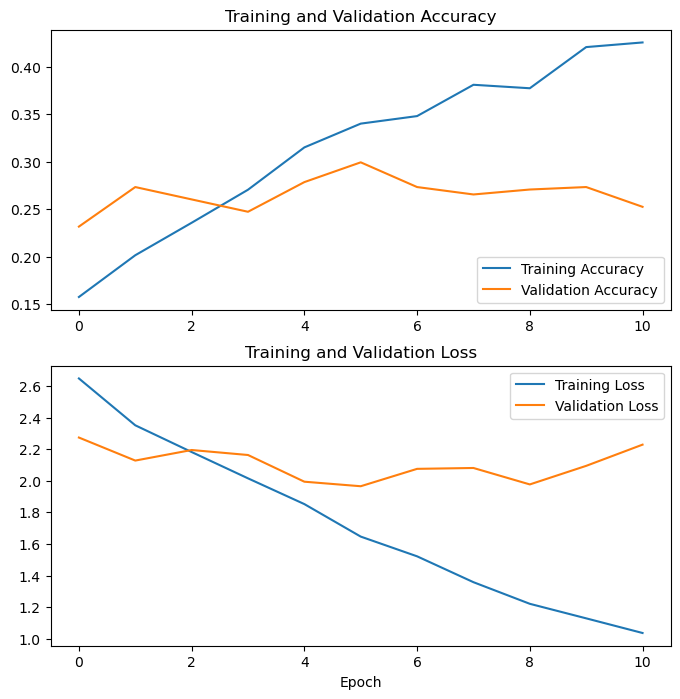

In [8]:
# Visualisation des résultats de l'entraînement

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()


💬 Remarque :

- Le modèle est sous-performant en ce qui concerne la précision, qui se situe autour de 25-30%. Cela suggère que le modèle a du mal à apprendre efficacement à partir des données.

- Apprentissage Stable : Malgré la faible précision, l'amélioration constante au fil des époques suggère que le modèle apprend. La tendance à la baisse de la perte soutient cela, bien que cela indique qu'il y a une marge significative d'amélioration.

- Sous-apprentissage Potentiel : Étant donné la faible précision et la perte élevée, le modèle pourrait sous-apprendre le jeu de données. Cela pourrait être dû à une complexité de modèle insuffisante, à un temps d'entraînement inadéquat ou à une extraction de caractéristiques sous-optimale.

- Tendances de Formation et de Validation Proches : Les lignes de formation et de validation pour la précision et la perte sont relativement proches, ce qui est généralement un bon signe. Cependant, dans ce contexte, cela indique probablement que le modèle sous-apprend également sur les deux ensembles de données.

## 2. Transfert Learning

#### VGG16 model

In [9]:
# Charger le modèle pré-entraîné VGG16 avec les poids ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du modèle VGG16 pour empêcher l'entraînement
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées au modèle
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Créer un nouveau modèle en spécifiant les entrées et les sorties
model_transfer_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compiler le modèle avec un optimiseur Adam
model_transfer_vgg16.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Afficher le résumé du modèle
model_transfer_vgg16.summary()

# Entraîner le modèle avec les données d'entraînement
history_transfer = model_transfer_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du modèle transféré
val_loss_transfer, val_acc_transfer = model_transfer_vgg16.evaluate(
    validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss_transfer}, Validation accuracy: {val_acc_transfer}')




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

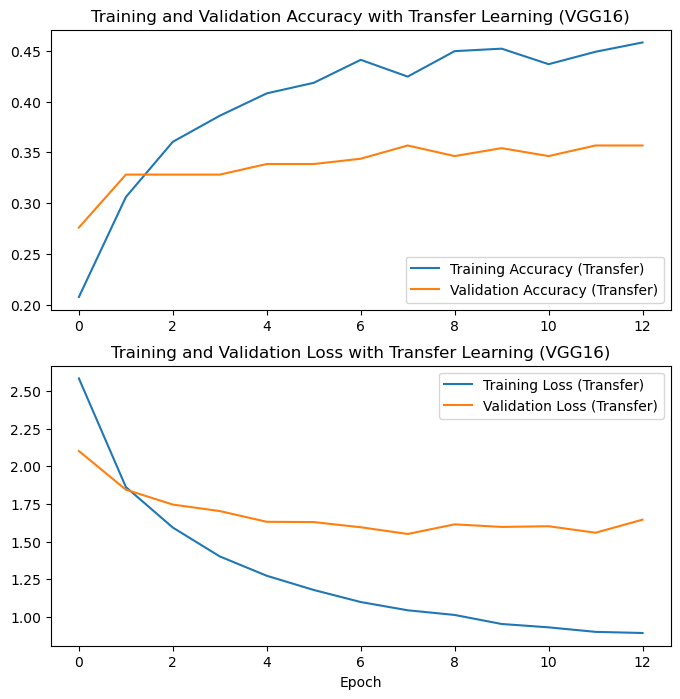

In [10]:
# Visualisation des résultats de l'entraînement avec transfert d'apprentissage
acc_transfer = history_transfer.history['accuracy']
val_acc_transfer = history_transfer.history['val_accuracy']
loss_transfer = history_transfer.history['loss']
val_loss_transfer = history_transfer.history['val_loss']

epochs_transfer = range(len(acc_transfer))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer, acc_transfer, label='Training Accuracy (Transfer)')
plt.plot(epochs_transfer, val_acc_transfer, label='Validation Accuracy (Transfer)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (VGG16)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer, loss_transfer, label='Training Loss (Transfer)')
plt.plot(epochs_transfer, val_loss_transfer, label='Validation Loss (Transfer)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (VGG16)')
plt.xlabel('Epoch')
plt.show()

### Comparaison des performances des deux modèles

12/12 [==============================] - 2s 130ms/step - loss: 1.9706 - accuracy: 0.2995
Validation loss (Scratch): 1.9705559015274048, Validation accuracy (Scratch): 0.2994791567325592
12/12 [==============================] - 31s 3s/step - loss: 1.5425 - accuracy: 0.3646
Validation loss (Transfer): 1.5425268411636353, Validation accuracy (Transfer): 0.3645833432674408


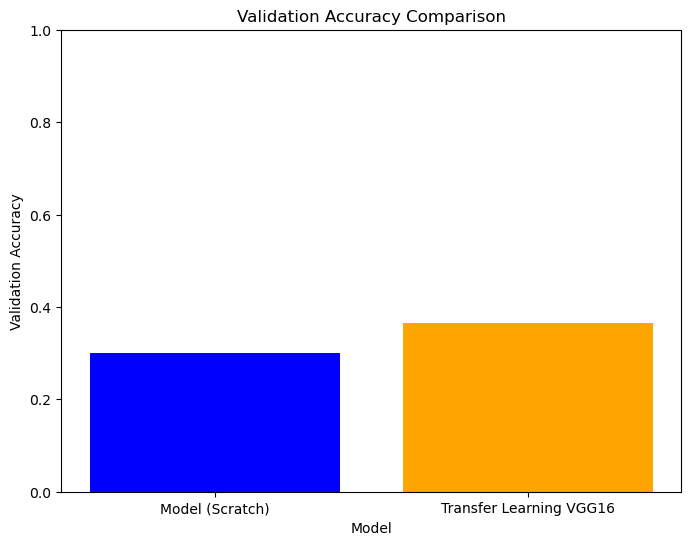

In [11]:
# Evaluation du modèle entraîné à partir de zéro
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                    steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Scratch): {val_loss_scratch}, Validation accuracy (Scratch): {val_acc_scratch}')

# Evaluation du modèle transféré
val_loss_transfer, val_acc_transfer = model_transfer_vgg16.evaluate(
    validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Transfer): {val_loss_transfer}, Validation accuracy (Transfer): {val_acc_transfer}')

# Visualisation des résultats de comparaison

plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning VGG16'], [val_acc_scratch, val_acc_transfer], color=['blue', 'orange'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()


#### ResNet50 model

In [12]:
# Charger le modèle pré-entraîné ResNet50 avec les poids ImageNet
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du modèle ResNet50 pour empêcher l'entraînement
for layer in base_model_resnet.layers:
    layer.trainable = False

# Ajouter des couches personnalisées au modèle ResNet50
x_resnet = Flatten()(base_model_resnet.output)
x_resnet = Dense(512, activation='relu')(x_resnet)
x_resnet = Dropout(0.5)(x_resnet)
predictions_resnet = Dense(len(train_generator.class_indices), activation='softmax')(x_resnet)

# Créer un nouveau modèle en spécifiant les entrées et les sorties
model_transfer_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# Compiler le modèle avec un optimiseur Adam
model_transfer_resnet.compile(optimizer=Adam(),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

# Entraîner le modèle avec les données d'entraînement
history_transfer_resnet = model_transfer_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 83s 1s/step - loss: 3.6834 - accuracy: 0.0855 - val_loss: 2.7169 - val_accuracy: 0.1276
Epoch 2/50
52/52 [==============================] - 72s 1s/step - loss: 2.8065 - accuracy: 0.1014 - val_loss: 2.6003 - val_accuracy: 0.1328
Epoch 3/50
52/52 [==============================] - 72s 1s/step - loss: 2.7552 - accuracy: 0.1081 - val_loss: 2.5796 - val_accuracy: 0.1354
Epoch 4/50
52/52 [==============================] - 72s 1s/step - loss: 2.7155 - accuracy: 0.1008 - val_loss: 2.5653 - val_accuracy: 0.1302
Epoch 5/50
52/52 [==============================] - 71s 1s/step - loss: 2.6953 - accuracy: 0.1136 - val_loss: 2.5884 - val_accuracy: 0.1328
Epoch 6/50
52/52 [==============================] - 72s 1s/step - loss: 2.7306 - accuracy: 0.1179 - val_loss: 2.5632 - val_accuracy: 0.1328
Epoch 7/50
52/52 [==============================] - 71s 1s/step - loss: 2.7083 - accuracy: 0.1173 - val_loss: 2.5821 - val_accuracy: 0.1354
Epoch 8/50
52/52 [==

12/12 [==============================] - 12s 1s/step - loss: 2.5432 - accuracy: 0.1302
Validation loss (ResNet50): 2.5432333946228027, Validation accuracy (ResNet50): 0.1302083283662796


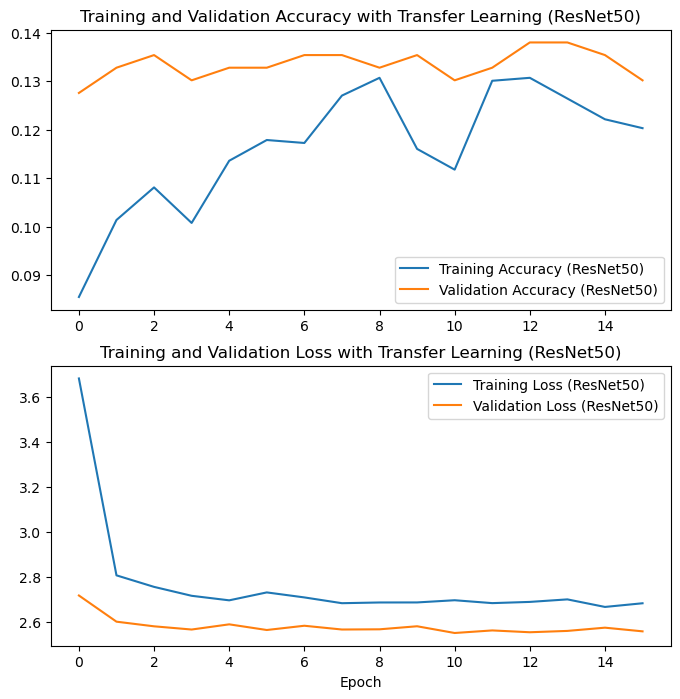

In [13]:

# Evaluation du modèle transféré ResNet50
val_loss_transfer_resnet, val_acc_transfer_resnet = model_transfer_resnet.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (ResNet50): {val_loss_transfer_resnet}, Validation accuracy (ResNet50): {val_acc_transfer_resnet}')

# Visualisation des résultats de l'entraînement avec transfert d'apprentissage ResNet50
acc_transfer_resnet = history_transfer_resnet.history['accuracy']
val_acc_transfer_resnet = history_transfer_resnet.history['val_accuracy']
loss_transfer_resnet = history_transfer_resnet.history['loss']
val_loss_transfer_resnet = history_transfer_resnet.history['val_loss']

epochs_transfer_resnet = range(len(acc_transfer_resnet))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_resnet, acc_transfer_resnet, label='Training Accuracy (ResNet50)')
plt.plot(epochs_transfer_resnet, val_acc_transfer_resnet, label='Validation Accuracy (ResNet50)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (ResNet50)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_resnet, loss_transfer_resnet, label='Training Loss (ResNet50)')
plt.plot(epochs_transfer_resnet, val_loss_transfer_resnet, label='Validation Loss (ResNet50)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (ResNet50)')
plt.xlabel('Epoch')
plt.show()

### Comparaison

12/12 [==============================] - 2s 126ms/step - loss: 1.9446 - accuracy: 0.2969
Validation loss (Scratch): 1.9446226358413696, Validation accuracy (Scratch): 0.296875
12/12 [==============================] - 12s 1s/step - loss: 2.5662 - accuracy: 0.1224
Validation loss (Transfer): 2.566235303878784, Validation accuracy (Transfer): 0.1223958358168602


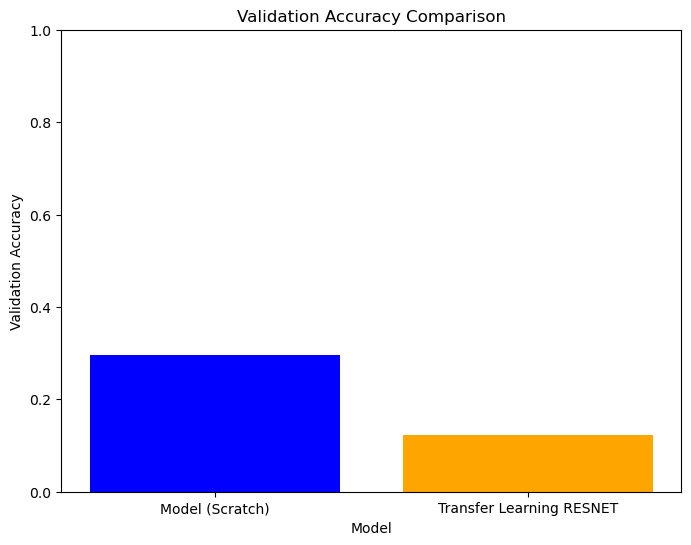

In [14]:
# Evaluation du modèle entraîné à partir de zéro
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Scratch): {val_loss_scratch}, Validation accuracy (Scratch): {val_acc_scratch}')

# Evaluation du modèle transféré
val_loss_transfer, val_acc_transfer = model_transfer_resnet.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Transfer): {val_loss_transfer}, Validation accuracy (Transfer): {val_acc_transfer}')

# Visualisation des résultats de comparaison

plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning RESNET'], [val_acc_scratch, val_acc_transfer], color=['blue', 'orange'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()


#### InceptionV3 model

In [15]:
# Load the InceptionV3 pre-trained model with ImageNet weights
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the InceptionV3 model
for layer in base_model_inception.layers:
    layer.trainable = False

# Add custom layers to the InceptionV3 base model
x_inception = Flatten()(base_model_inception.output)
x_inception = Dense(512, activation='relu')(x_inception)
x_inception = Dropout(0.5)(x_inception)
predictions_inception = Dense(len(train_generator.class_indices), activation='softmax')(x_inception)

# Create the full model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

# Compile the InceptionV3 model
model_inception.compile(optimizer=Adam(),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the InceptionV3 model
history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 49s 751ms/step - loss: 8.7893 - accuracy: 0.1888 - val_loss: 2.2496 - val_accuracy: 0.2578
Epoch 2/50
52/52 [==============================] - 35s 682ms/step - loss: 2.1832 - accuracy: 0.2651 - val_loss: 1.9793 - val_accuracy: 0.3255
Epoch 3/50
52/52 [==============================] - 33s 631ms/step - loss: 1.8742 - accuracy: 0.3195 - val_loss: 1.8629 - val_accuracy: 0.2995
Epoch 4/50
52/52 [==============================] - 35s 677ms/step - loss: 1.6903 - accuracy: 0.3360 - val_loss: 1.7968 - val_accuracy: 0.3229
Epoch 5/50
52/52 [==============================] - 35s 668ms/step - loss: 1.5522 - accuracy: 0.3561 - val_loss: 1.7084 - val_accuracy: 0.3281
Epoch 6/50
52/52 [==============================] - 34s 660ms/step - loss: 1.3682 - accuracy: 0.3842 - val_loss: 1.6344 - val_accuracy: 0.3411
Epoch 7/50
52/52 [==============================] - 34s 658ms/step - loss: 1.2402 - accuracy: 0.4026 - val_loss: 1.7591 - val_accuracy: 0.3307

12/12 [==============================] - 6s 490ms/step - loss: 1.6471 - accuracy: 0.3359
Validation loss (InceptionV3): 1.6471134424209595, Validation accuracy (InceptionV3): 0.3359375


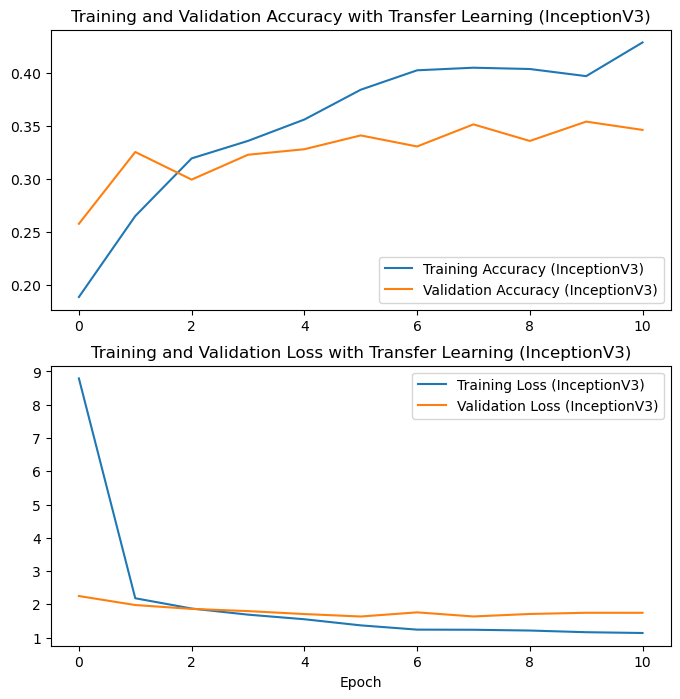

In [16]:
# Evaluation of the InceptionV3 transferred model
val_loss_transfer_inception, val_acc_transfer_inception = model_inception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)
print(f'Validation loss (InceptionV3): {val_loss_transfer_inception}, Validation accuracy (InceptionV3): {val_acc_transfer_inception}')

# Visualization of the training results with InceptionV3 transfer learning
acc_transfer_inception = history_inception.history['accuracy']
val_acc_transfer_inception = history_inception.history['val_accuracy']
loss_transfer_inception = history_inception.history['loss']
val_loss_transfer_inception = history_inception.history['val_loss']

epochs_transfer_inception = range(len(acc_transfer_inception))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_inception, acc_transfer_inception, label='Training Accuracy (InceptionV3)')
plt.plot(epochs_transfer_inception, val_acc_transfer_inception, label='Validation Accuracy (InceptionV3)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (InceptionV3)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_inception, loss_transfer_inception, label='Training Loss (InceptionV3)')
plt.plot(epochs_transfer_inception, val_loss_transfer_inception, label='Validation Loss (InceptionV3)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (InceptionV3)')
plt.xlabel('Epoch')
plt.show()


### Comparaison

12/12 [==============================] - 6s 479ms/step - loss: 1.6110 - accuracy: 0.3411


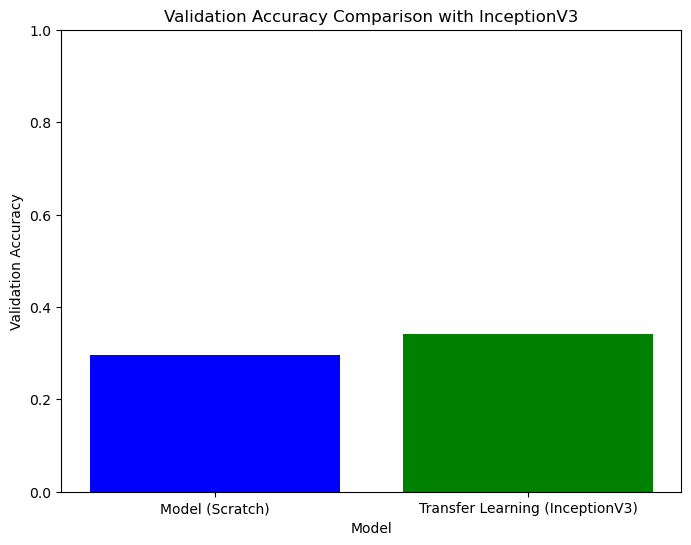

In [17]:
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                    steps=validation_generator.samples // validation_generator.batch_size)
val_loss_transfer_inception, val_acc_transfer_inception = model_inception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)

#Visualization of comparison results for InceptionV3
plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning (InceptionV3)'], [val_acc_scratch, val_acc_transfer_inception], color=['blue', 'green'])
plt.title('Validation Accuracy Comparison with InceptionV3')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)  
plt.show()

#### Xception model

In [18]:
# Load the Xception pre-trained model with ImageNet weights
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the Xception model
for layer in base_model_xception.layers:
    layer.trainable = False

# Add custom layers to the Xception base model
x_xception = Flatten()(base_model_xception.output)
x_xception = Dense(512, activation='relu')(x_xception)
x_xception = Dropout(0.5)(x_xception)
predictions_xception = Dense(len(train_generator.class_indices), activation='softmax')(x_xception)

# Create the full model
model_xception = Model(inputs=base_model_xception.input, outputs=predictions_xception)

# Compile the Xception model
model_xception.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the Xception model
history_xception = model_xception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 82s 1s/step - loss: 7.8264 - accuracy: 0.2022 - val_loss: 2.2087 - val_accuracy: 0.3021
Epoch 2/50
52/52 [==============================] - 72s 1s/step - loss: 2.0379 - accuracy: 0.3189 - val_loss: 1.7815 - val_accuracy: 0.3281
Epoch 3/50
52/52 [==============================] - 72s 1s/step - loss: 1.6828 - accuracy: 0.3396 - val_loss: 1.7938 - val_accuracy: 0.3203
Epoch 4/50
52/52 [==============================] - 73s 1s/step - loss: 1.4637 - accuracy: 0.3720 - val_loss: 1.7351 - val_accuracy: 0.3255
Epoch 5/50
52/52 [==============================] - 73s 1s/step - loss: 1.3143 - accuracy: 0.3958 - val_loss: 1.6943 - val_accuracy: 0.3542
Epoch 6/50
52/52 [==============================] - 72s 1s/step - loss: 1.2382 - accuracy: 0.3958 - val_loss: 1.6072 - val_accuracy: 0.3646
Epoch 7/50
52/52 [==============================] - 73s 1s/step - loss: 1.1172 - accuracy: 0.4258 - val_loss: 1.6685 - val_accuracy: 0.3516
Epoch 8/50
52/52 [==

12/12 [==============================] - 12s 1s/step - loss: 1.6532 - accuracy: 0.3464
Validation loss (Xception): 1.6532069444656372, Validation accuracy (Xception): 0.3463541567325592


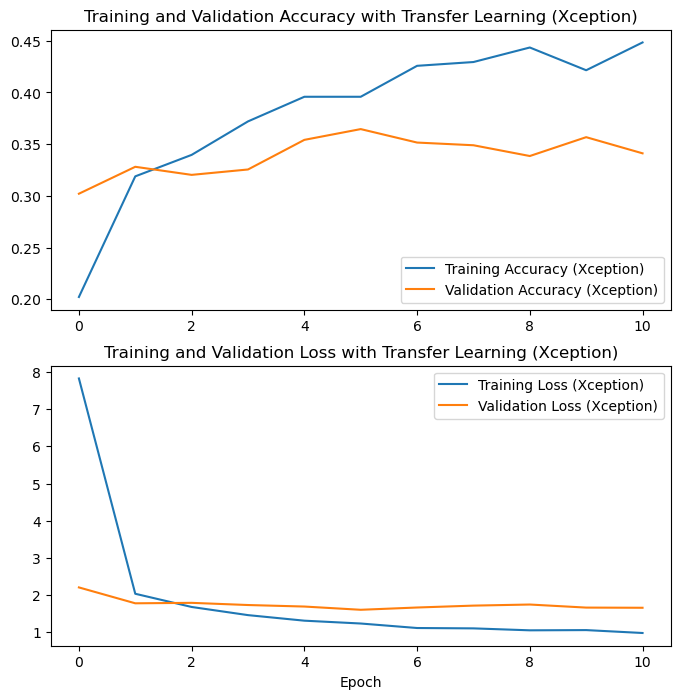

In [19]:
# Evaluation of the Xception transferred model
val_loss_transfer_xception, val_acc_transfer_xception = model_xception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)
print(f'Validation loss (Xception): {val_loss_transfer_xception}, Validation accuracy (Xception): {val_acc_transfer_xception}')

# Visualization of the training results with Xception transfer learning
acc_transfer_xception = history_xception.history['accuracy']
val_acc_transfer_xception = history_xception.history['val_accuracy']
loss_transfer_xception = history_xception.history['loss']
val_loss_transfer_xception = history_xception.history['val_loss']

epochs_transfer_xception = range(len(acc_transfer_xception))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_xception, acc_transfer_xception, label='Training Accuracy (Xception)')
plt.plot(epochs_transfer_xception, val_acc_transfer_xception, label='Validation Accuracy (Xception)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (Xception)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_xception, loss_transfer_xception, label='Training Loss (Xception)')
plt.plot(epochs_transfer_xception, val_loss_transfer_xception, label='Validation Loss (Xception)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (Xception)')
plt.xlabel('Epoch')
plt.show()


### Comparaison

12/12 [==============================] - 12s 1s/step - loss: 1.6270 - accuracy: 0.3568


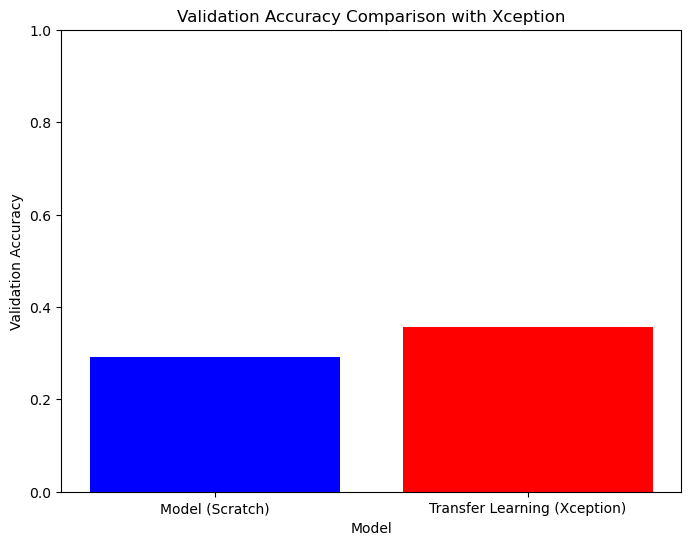

In [20]:
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                   steps=validation_generator.samples // validation_generator.batch_size)



# Après avoir entraîné le modèle Xception avec transfert d'apprentissage
val_loss_transfer_xception, val_acc_transfer_xception = model_xception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)


# Visualization of comparison results for Xception
plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning (Xception)'], [val_acc_scratch, val_acc_transfer_xception], color=['blue', 'red'])
plt.title('Validation Accuracy Comparison with Xception')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)  # Make sure the y-axis starts at 0 and ends at 1 for consistency
plt.show()


💬 Remarque et conclusion

**À partir de zéro :**

Avantages :
- Contrôle complet sur l'architecture.
- Aucune dépendance vis-à-vis des modèles préexistants, ce qui peut être bénéfique si les données sont très différentes d'ImageNet.

Inconvénients :
- Nécessite plus de données pour bien généraliser.
- Temps d'entraînement plus longs.
- Souvent, cela aboutit à une précision inférieure par rapport à l'apprentissage par transfert, en particulier avec de petits ensembles de données.

**Apprentissage par transfert avec VGG16 :**

Avantages :
- Bénéficie des poids pré-entraînés sur ImageNet, ce qui aide à la convergence.
- Bon pour apprendre des caractéristiques à partir d'images qui sont quelque peu similaires à ImageNet.
    
Inconvénients :
- Réseau très profond avec de nombreux paramètres, ce qui le rend gourmand en calcul.
- Tend à être plus lent que d'autres modèles comme ResNet ou Inception en raison de sa profondeur.

**Apprentissage par transfert avec ResNet50 :**

Avantages :

- Utilise des connexions résiduelles pour permettre l'entraînement de réseaux très profonds sans dégradation.
- Convergence généralement plus rapide par rapport à VGG16 grâce aux connexions de saut.

Inconvénients :
- Peut être excessif pour des tâches simples ou des ensembles de données très petits.

**Apprentissage par transfert avec InceptionV3 :**

Avantages :
- Utilise un mélange de tailles de filtres pour capturer des informations à diverses échelles.
- Plus efficace en termes de paramètres que VGG16.
    
Inconvénients :
- Une architecture plus complexe peut être plus difficile à adapter à de nouvelles tâches.
- Parfois plus lent à entraîner en raison de la complexité des modules d'inception.

**Apprentissage par transfert avec Xception :**

Avantages :
- Utilise des convolutions séparables en profondeur, qui peuvent être plus efficaces que les convolutions traditionnelles.
- Atteint souvent une précision plus élevée sur les ensembles de données de référence.

Inconvénients :
- Peut nécessiter plus de réglages fins pour adapter les poids pré-entraînés à une nouvelle tâche.
- Peut toujours être gourmand en calcul malgré l'efficacité de ses convolutions.


## 3. Data Augmentation

In [21]:
#  Préparation des données pour l'entraînement

# Chemin vers le dossier contenant les images croppées
base_dir = 'cropped_train_images'

# Création des générateurs d'images avec augmentation de données pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Utilisation de 20% des données pour la validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images après redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Défini pour l'entraînement

Found 1669 images belonging to 26 classes.


Que l'on effectue une rotation, un changement de longueur ou de hauteur, un zoom ou un *flip* horizontal, on ne change pas la classe des images. C'est pour cette raison que l'on peut effectuer ces opérations dans le cadre de la *data augmentation*.

In [22]:
#On évalue nos différents modèles en les entraînant sur nos données augmentées

def evaluate_models(*models):
    losses = []
    accuracies = []
    for model in models:
        val_loss, val_acc = model.evaluate(validation_generator,
                                           steps=validation_generator.samples // validation_generator.batch_size)
        losses.append(val_loss)
        accuracies.append(val_acc)
    return losses, accuracies

#Losses et accuracies avant data augmentation
losses_1, accuracies_1 = evaluate_models(
    model1, model_transfer_vgg16, model_transfer_resnet, model_inception, model_xception
)


# Entraînement des modèles

model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

model_transfer_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

model_transfer_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

model_xception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


# Evaluation des modèles

#Losses et accuracies avant data augmentation
losses_2, accuracies_2 = evaluate_models(
    model1, model_transfer_vgg16, model_transfer_resnet, model_inception, model_xception
)


print(f'Validation loss (first model) : {losses_2[0]}, Validation accuracy (first model) : {accuracies_2[0]}')
print(f'Validation loss (VGG16) : {losses_2[1]}, Validation accuracy (VGG16) : {accuracies_2[1]}')
print(f'Validation loss (ResNet50) : {losses_2[2]}, Validation accuracy (ResNet50) : {accuracies_2[2]}')
print(f'Validation loss (InceptionV3): {losses_2[3]}, Validation accuracy (InceptionV3): {accuracies_2[3]}')
print(f'Validation loss (Xception): {losses_2[4]}, Validation accuracy (Xception): {accuracies_2[4]}')

12/12 [==============================] - 12s 1s/step - loss: 1.6279 - accuracy: 0.3568
Epoch 1/50
52/52 [==============================] - 36s 687ms/step - loss: 2.1336 - accuracy: 0.2285 - val_loss: 1.9837 - val_accuracy: 0.2891
Epoch 2/50
52/52 [==============================] - 36s 684ms/step - loss: 2.0763 - accuracy: 0.2529 - val_loss: 1.9948 - val_accuracy: 0.2734
Epoch 3/50
52/52 [==============================] - 37s 703ms/step - loss: 2.0274 - accuracy: 0.2517 - val_loss: 2.0619 - val_accuracy: 0.2760
Epoch 4/50
52/52 [==============================] - 36s 685ms/step - loss: 2.0724 - accuracy: 0.2431 - val_loss: 2.0684 - val_accuracy: 0.2708
Epoch 5/50
52/52 [==============================] - 35s 662ms/step - loss: 2.0169 - accuracy: 0.2645 - val_loss: 2.0869 - val_accuracy: 0.2500
Epoch 6/50
52/52 [==============================] - 35s 678ms/step - loss: 1.9976 - accuracy: 0.2547 - val_loss: 2.0229 - val_accuracy: 0.2552
Epoch 1/50
52/52 [==============================] - 165

52/52 [==============================] - 54s 1s/step - loss: 2.0004 - accuracy: 0.2896 - val_loss: 1.6656 - val_accuracy: 0.3516
Epoch 4/50
52/52 [==============================] - 55s 1s/step - loss: 1.8956 - accuracy: 0.2889 - val_loss: 1.7065 - val_accuracy: 0.3281
Epoch 5/50
52/52 [==============================] - 54s 1s/step - loss: 1.8593 - accuracy: 0.3054 - val_loss: 1.8929 - val_accuracy: 0.2969
Epoch 6/50
52/52 [==============================] - 54s 1s/step - loss: 1.8725 - accuracy: 0.3030 - val_loss: 1.7169 - val_accuracy: 0.3464
Epoch 7/50
52/52 [==============================] - 53s 1s/step - loss: 1.7560 - accuracy: 0.2944 - val_loss: 1.7061 - val_accuracy: 0.3359
Epoch 8/50
12/12 [==============================] - 8s 699ms/step - loss: 1.6370 - accuracy: 0.3568
Validation loss (first model) : 2.0052545070648193, Validation accuracy (first model) : 0.2786458432674408
Validation loss (VGG16) : 1.540016770362854, Validation accuracy (VGG16) : 0.359375
Validation loss (Res

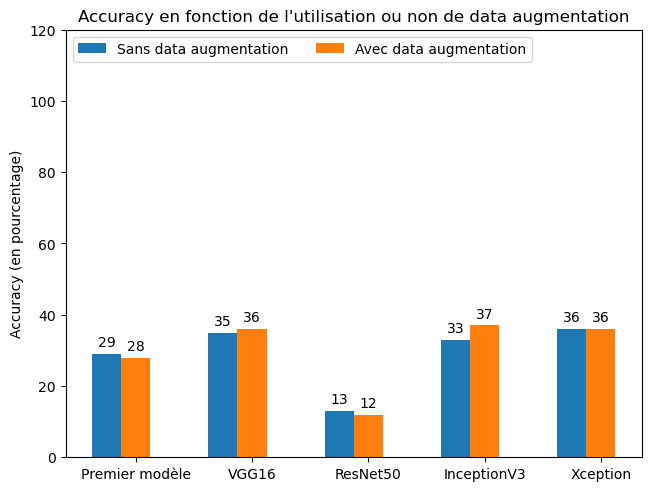

In [23]:
modeles = ("Premier modèle", "VGG16", "ResNet50", "InceptionV3", "Xception")
donnees = {
    "Sans data augmentation": [round(100*a) for a in accuracies_1],
    "Avec data augmentation": [round(100*a) for a in accuracies_2]
}

x = np.arange(len(modeles))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in donnees.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (en pourcentage)')
ax.set_title("Accuracy en fonction de l'utilisation ou non de data augmentation")
ax.set_xticks(x + width, modeles)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 120)

plt.show()

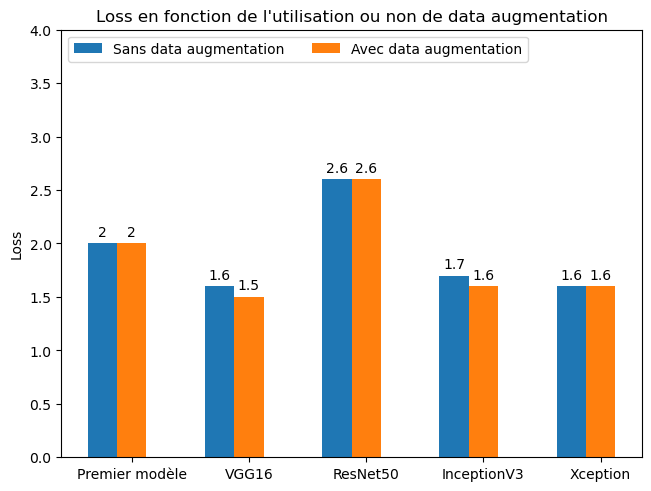

In [24]:
modeles = ("Premier modèle", "VGG16", "ResNet50", "InceptionV3", "Xception")
donnees = {
    "Sans data augmentation": [round(l, 1) for l in losses_1],
    "Avec data augmentation": [round(l, 1) for l in losses_2]
}

x = np.arange(len(modeles))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in donnees.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Loss")
ax.set_title("Loss en fonction de l'utilisation ou non de data augmentation")
ax.set_xticks(x + width, modeles)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 4)

plt.show()

On peut constater que la data augmentation augmente les *accuracies* de certains modèles et n'augmente pas (ou pas significativement) celles de d'autres modèles. Elle baisse aussi les performances d'un modèle (ResNet50).

Il est également, et surtout, intéressant de constater que la meilleure *accuracy* est atteinte **avec** data augmentation (en utilisant le modèle Xception).

## 4. Détection

Nous allons utiliser TensorFlow et YOLOv8 

##### YOLOv8

In [2]:
# Install the ultralytics package
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 KB 4.0 MB/s eta 0:00:00a 0:00:01


In [6]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

In [27]:
x = 30  #  train for 50 epochs
results = model.train(data='/home/mohammed/Fish.v1-416x416.yolov8/data.yaml', epochs=x)


Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/mohammed/Fish.v1-416x416.yolov8/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

train: Scanning /home/mohammed/Fish.v1-416x416.yolov8/train/labels.cache... 944 images, 0 backgrounds, 0 corrupt: 100%|██████████| 944/944 [00:00<?, ?it/s]
val: Scanning /home/mohammed/Fish.v1-416x416.yolov8/valid/labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2024/02/28 23:08:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(61276b6c2106497dae838ed33b2e5d3e) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
MLflow: WARNING ⚠️ Failed to initialize: Changing param values is not allowed. Param with key='epochs' was already logged with value='50' for run ID='61276b6c2106497dae838ed33b2e5d3e'. Attempted logging new value '30'.
MLflow: WARNING ⚠️ Not tracking this run
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train8
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      2.457      3.454      2.351        100        640: 100%|██████████| 59/59 [04:50<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:34<00:00,  3.87s/it]

                   all        270        651      0.214      0.169     0.0729     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.869      2.671      1.904         59        640: 100%|██████████| 59/59 [05:11<00:00,  5.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:40<00:00,  4.52s/it]

                   all        270        651      0.226      0.309      0.204      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.584      2.408      1.698         41        640: 100%|██████████| 59/59 [04:52<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.59s/it]

                   all        270        651      0.276      0.371      0.246      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G       1.43      2.227      1.569         94        640: 100%|██████████| 59/59 [04:50<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.58s/it]

                   all        270        651      0.276       0.41      0.267      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.319      2.101      1.484         86        640: 100%|██████████| 59/59 [04:53<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.68s/it]

                   all        270        651      0.292       0.45      0.295      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.261      1.993      1.447         66        640: 100%|██████████| 59/59 [04:41<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.62s/it]

                   all        270        651      0.288      0.464      0.297      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.216      1.929      1.413         51        640: 100%|██████████| 59/59 [04:39<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:31<00:00,  3.55s/it]

                   all        270        651      0.317      0.468      0.308        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G       1.18      1.878      1.372         58        640: 100%|██████████| 59/59 [04:39<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.57s/it]

                   all        270        651      0.307      0.472      0.306      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.147       1.85      1.383         54        640: 100%|██████████| 59/59 [04:39<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.65s/it]

                   all        270        651      0.282      0.471      0.306      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G       1.12       1.78      1.337         63        640: 100%|██████████| 59/59 [04:49<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:37<00:00,  4.18s/it]

                   all        270        651      0.294      0.476      0.305      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.108      1.767      1.339         50        640: 100%|██████████| 59/59 [04:49<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.63s/it]

                   all        270        651      0.316      0.476      0.316      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.073      1.734      1.322         91        640: 100%|██████████| 59/59 [04:42<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:31<00:00,  3.53s/it]

                   all        270        651      0.303      0.488      0.312      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.061      1.704      1.323         68        640: 100%|██████████| 59/59 [04:44<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:31<00:00,  3.55s/it]

                   all        270        651      0.299      0.487      0.302      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.029      1.687      1.297         57        640: 100%|██████████| 59/59 [04:37<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:31<00:00,  3.49s/it]

                   all        270        651      0.303      0.498      0.308        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.026      1.688      1.284         64        640: 100%|██████████| 59/59 [04:35<00:00,  4.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.70s/it]

                   all        270        651      0.299      0.506        0.3      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.023      1.669      1.282         79        640: 100%|██████████| 59/59 [04:43<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.64s/it]

                   all        270        651      0.312      0.491      0.316      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.011      1.642      1.283         55        640: 100%|██████████| 59/59 [04:42<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.64s/it]

                   all        270        651       0.31        0.5      0.316      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      0.996      1.615      1.261         38        640: 100%|██████████| 59/59 [04:43<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.64s/it]

                   all        270        651       0.31      0.501      0.309      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.9916        1.6      1.254         58        640: 100%|██████████| 59/59 [6:41:04<00:00, 407.87s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:38<00:00,  4.29s/it]

                   all        270        651      0.319      0.491      0.321      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.9844      1.605       1.25         52        640: 100%|██████████| 59/59 [05:19<00:00,  5.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:35<00:00,  3.94s/it]

                   all        270        651      0.308      0.548      0.315       0.22


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.8903       1.59      1.222         24        640: 100%|██████████| 59/59 [05:11<00:00,  5.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:40<00:00,  4.45s/it]

                   all        270        651      0.316      0.507      0.315      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.8917      1.538      1.218         28        640:  41%|████      | 24/59 [02:03<02:59,  5.14s/it]


KeyboardInterrupt: 

In [47]:
import cv2

# Chemin de l'image
img_path = '/home/mohammed/Fish.v1-416x416.yolov8/test/images/FishDataset689_png.rf.UwlR0UUJiTPeWBvshLmq.jpg'

# Charger l'image avec OpenCV
img = cv2.imread(img_path)

# Exécutez la prédiction sur l'image chargée
results = model.predict(img, stream=True)

# Itérez sur les résultats
for result in results:
    boxes = result.boxes.cpu().numpy()  # Obtenir les boîtes en format numpy
    for box in boxes:
        r = box.xyxy[0].astype(int)  # Obtenir les points de coin comme entiers
        class_id = int(box.cls[0])  # Obtenir l'ID de la classe
        class_name = model.names[class_id]  # Obtenir le nom de la classe en utilisant l'ID de classe
        print(f"Classe: {class_name}, Boîte: {r}")  # Imprimer le nom de la classe et les coordonnées de la boîte
        # Dessiner les boîtes sur l'image
        cv2.rectangle(img, (r[0], r[1]), (r[2], r[3]), (0, 255, 0), 2)

save_path_image= '/home/mohammed/Downloads/FishDataset82_detected.jpg'
# Sauvegarder l'image modifiée sur le disque
cv2.imwrite(save_path_image, img)



Classe: shark, Boîte: [294 256 407 326]
Classe: Shark -Selachimorpha-, Boîte: [ 78  68 355 281]
Classe: shark, Boîte: [182 311 296 382]
Classe: shark, Boîte: [ 76  68 358 282]
Classe: tuna, Boîte: [ 92 342 193 393]
Classe: Shark -Selachimorpha-, Boîte: [182 310 296 382]
Classe: Shark -Selachimorpha-, Boîte: [294 257 407 326]
0: 640x640 3 Shark -Selachimorpha-s, 3 sharks, 1 tuna, 95.2ms
Speed: 1.9ms preprocess, 95.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


True

In [46]:
from PIL import Image

# To see the image
image = Image.open(save_path_image)
image.show()

**Remarques :**

- Les courbes d'apprentissage du taux d'apprentissage (lr/pg0, lr/pg1, lr/pg2) montrent une augmentation initiale suivie d'une décroissance, ce qui est caractéristique d'une politique de taux d'apprentissage avec un échauffement suivi d'une décroissance progressive. Cette stratégie est souvent utilisée pour stabiliser l'apprentissage au début et pour affiner les ajustements des poids du réseau au fil du temps.

- La métrique mAP@0.5 (mean Average Precision à un seuil IoU de 0.5) montre une augmentation constante, ce qui indique que la précision moyenne du modèle pour détecter des objets avec une précision d'intersection sur union (IoU) de 50% s'améliore au fil des époques.

- La métrique mAP@0.5-0.95, qui est une moyenne de la précision sur différents seuils d'IoU de 0.5 à 0.95, augmente également, suggérant que le modèle s'améliore pour détecter des objets avec des critères d'IoU plus stricts.

- Les précisions et rappels (precision(B) et recall(B)) s'améliorent aussi avec le temps, ce qui suggère que le modèle devient meilleur pour identifier les objets pertinents (précision) et pour détecter la majorité des objets pertinents présents (rappel).

- Les pertes de formation et de validation (train/box_loss, train/cls_loss, train/obj_loss, val/box_loss, val/cls_loss, val/obj_loss) montrent toutes une tendance à la baisse, ce qui indique que le modèle apprend de manière efficace et que les erreurs de prédiction diminuent.

**Conclusion :**

Le modèle montre une amélioration constante dans toutes les métriques clés au fil des époques, ce qui indique un bon processus d'apprentissage. La diminution des pertes et l'augmentation de la mAP indiquent que le modèle s'adapte bien aux données et devient plus précis dans ses prédictions. Toutefois, il est important de noter que la mAP n'atteint pas des niveaux très élevés, ce qui peut signifier que le modèle a encore de la marge pour s'améliorer ou que les données sont particulièrement difficiles.

On va essayer de changer un peu les hyperparmètre

In [1]:
from ultralytics import YOLO
 
# Load the model.
model = YOLO('yolov8n.pt')
 
# Training.
results = model.train(
   data='/home/mohammed/Fish.v1-416x416.yolov8/data.yaml',
   imgsz=1280,
   epochs=50,
   batch=4,
   name='yolov8n_custom')

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/mohammed/Fish.v1-416x416.yolov8/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

2024-02-29 09:32:32.121236: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 09:32:32.121365: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 09:32:32.154001: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=26

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /home/mohammed/Fish.v1-416x416.yolov8/train/labels.cache... 944 images, 0 backgrounds, 0 corrupt: 100%|██████████| 944/944 [00:00<?, ?it/s]
val: Scanning /home/mohammed/Fish.v1-416x416.yolov8/valid/labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2024/02/29 09:32:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(d1fab8e10a0249c9b59f890b56fee74c) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8n_custom5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.734      5.769      2.255         16       1280: 100%|██████████| 236/236 [17:59<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:52<00:00,  3.31s/it]

                   all        270        651      0.592     0.0743     0.0338     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.575      5.008      2.046         12       1280: 100%|██████████| 236/236 [17:59<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:55<00:00,  3.39s/it]

                   all        270        651      0.397      0.144     0.0614     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.563       4.74      2.038         11       1280: 100%|██████████| 236/236 [18:02<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:53<00:00,  3.34s/it]

                   all        270        651      0.205      0.182     0.0772     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.502      4.459      1.953         30       1280: 100%|██████████| 236/236 [17:52<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:52<00:00,  3.31s/it]

                   all        270        651      0.107      0.204      0.096     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.491      4.183      1.944         14       1280: 100%|██████████| 236/236 [17:53<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:54<00:00,  3.36s/it]

                   all        270        651      0.127      0.209      0.116     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.456       3.92      1.899         16       1280: 100%|██████████| 236/236 [17:49<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:52<00:00,  3.32s/it]

                   all        270        651      0.147      0.233       0.13     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.428      3.767      1.869         12       1280: 100%|██████████| 236/236 [17:48<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:52<00:00,  3.31s/it]

                   all        270        651      0.162      0.279      0.152     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.389      3.586      1.855         21       1280: 100%|██████████| 236/236 [17:48<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:53<00:00,  3.35s/it]

                   all        270        651      0.223      0.224      0.174     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.393      3.586      1.836          6       1280: 100%|██████████| 236/236 [17:53<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:54<00:00,  3.38s/it]

                   all        270        651      0.222      0.288      0.177     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.348      3.332      1.793         22       1280: 100%|██████████| 236/236 [17:50<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:53<00:00,  3.35s/it]

                   all        270        651      0.183      0.295      0.171     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.361      3.292      1.803         12       1280: 100%|██████████| 236/236 [17:49<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:52<00:00,  3.30s/it]

                   all        270        651      0.228      0.357      0.211      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.362      3.201      1.792         23       1280: 100%|██████████| 236/236 [17:47<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:51<00:00,  3.29s/it]

                   all        270        651      0.229      0.331      0.208      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G       1.35      3.097      1.774         34       1280: 100%|██████████| 236/236 [17:48<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:50<00:00,  3.26s/it]

                   all        270        651      0.217      0.367      0.208      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.304      2.958      1.746         20       1280: 100%|██████████| 236/236 [17:47<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:52<00:00,  3.31s/it]

                   all        270        651      0.225      0.382      0.218      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.282      2.909      1.719         10       1280: 100%|██████████| 236/236 [17:49<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:51<00:00,  3.29s/it]

                   all        270        651      0.231      0.385      0.218      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.257      2.826      1.721         23       1280: 100%|██████████| 236/236 [17:47<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:52<00:00,  3.31s/it]

                   all        270        651       0.27      0.398      0.257      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.277      2.759      1.704          8       1280: 100%|██████████| 236/236 [17:47<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:52<00:00,  3.30s/it]

                   all        270        651      0.241      0.404      0.245      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.246      2.672      1.671         13       1280: 100%|██████████| 236/236 [17:44<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:53<00:00,  3.32s/it]

                   all        270        651      0.187      0.387      0.188     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.215      2.574      1.653         22       1280: 100%|██████████| 236/236 [18:05<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:51<00:00,  3.29s/it]

                   all        270        651      0.283      0.379      0.249      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.235      2.561      1.666         11       1280: 100%|██████████| 236/236 [17:52<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:51<00:00,  3.29s/it]

                   all        270        651      0.261      0.419       0.24      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.192      2.467      1.636         22       1280: 100%|██████████| 236/236 [18:03<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:53<00:00,  3.33s/it]

                   all        270        651      0.249      0.378      0.239      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.192      2.409      1.644         10       1280: 100%|██████████| 236/236 [18:00<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:51<00:00,  3.28s/it]

                   all        270        651      0.246      0.432      0.235      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.158      2.428      1.624         11       1280: 100%|██████████| 236/236 [17:55<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:56<00:00,  3.44s/it]

                   all        270        651       0.27      0.387       0.25      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.178      2.386      1.615         34       1280: 100%|██████████| 236/236 [17:55<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [01:55<00:00,  3.40s/it]

                   all        270        651      0.246      0.409       0.23      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.187      2.232      1.676         15       1280:   4%|▍         | 10/236 [00:50<19:07,  5.08s/it]


KeyboardInterrupt: 

In [2]:
import cv2

# Chemin de l'image
img_path = '/home/mohammed/Fish.v1-416x416.yolov8/test/images/FishDataset689_png.rf.UwlR0UUJiTPeWBvshLmq.jpg'

# Charger l'image avec OpenCV
img = cv2.imread(img_path)

# Exécutez la prédiction sur l'image chargée
results = model.predict(img, stream=True)

# Itérez sur les résultats
for result in results:
    boxes = result.boxes.cpu().numpy()  # Obtenir les boîtes en format numpy
    for box in boxes:
        r = box.xyxy[0].astype(int)  # Obtenir les points de coin comme entiers
        class_id = int(box.cls[0])  # Obtenir l'ID de la classe
        class_name = model.names[class_id]  # Obtenir le nom de la classe en utilisant l'ID de classe
        print(f"Classe: {class_name}, Boîte: {r}")  # Imprimer le nom de la classe et les coordonnées de la boîte
        # Dessiner les boîtes sur l'image
        cv2.rectangle(img, (r[0], r[1]), (r[2], r[3]), (0, 255, 0), 2)

save_path_image= '/home/mohammed/Downloads/FishDataset82_detected.jpg'
# Sauvegarder l'image modifiée sur le disque
cv2.imwrite(save_path_image, img)



Classe: Shark -Selachimorpha-, Boîte: [ 65  63 362 278]
Classe: Scombridae -Tunas-, Boîte: [294 251 409 324]
Classe: Scombridae -Tunas-, Boîte: [182 308 298 386]
0: 640x640 2 Scombridae -Tunas-s, 1 Shark -Selachimorpha-, 75.0ms
Speed: 2.6ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


True

**Remarques :**

- Réduction progressive des pertes : Les pertes (box_loss, cls_loss, dfl_loss) ont globalement diminué au fil des époques, ce qui indique que le modèle s'améliore et apprend de mieux en mieux à prédire les boîtes englobantes, les classes des objets, et les déformations des boîtes.
- Variation du nombre d'instances : Le nombre d'instances traitées varie à chaque époque, ce qui est normal dans le cadre d'un entraînement par lots. Cela n'indique pas nécessairement un problème mais reflète le processus d'entraînement.
- Amélioration des performances de détection : Les métriques de précision (Box(P), R, mAP50, mAP50-95) montrent une tendance à l'amélioration, bien que les variations soient modestes et parfois irrégulières. Cela signifie que le modèle devient progressivement meilleur pour détecter les objets avec une précision et un rappel accrus, bien que l'amélioration soit lente.

**Conclusion :**

- Le modèle montre une amélioration au fil du temps en termes de réduction des pertes et d'augmentation de certaines métriques de performance comme le mAP (Mean Average Precision). Cependant, les améliorations sont modestes et indiquent que le modèle pourrait bénéficier de davantage d'optimisation ou d'ajustements. Cela peut inclure des changements dans l'architecture du modèle, des ajustements des hyperparamètres, ou l'utilisation de techniques d'augmentation des données pour améliorer la généralisation du modèle.



**Comparaison :**
- Amélioration de la vitesse : Le modèle actuel montre une amélioration significative en termes de vitesse d'inférence, réduisant le temps d'inférence de 95.2 ms à 75.0 ms par image. Ceci est un avantage notable pour les applications nécessitant une réponse rapide, comme la surveillance en temps réel ou les systèmes embarqués.
- Réduction du nombre de détections : Le modèle actuel détecte moins d'objets (3 au total) par rapport au modèle précédent (7 au total). Cela pourrait indiquer une meilleure focalisation sur les détections de haute confiance ou un compromis entre la vitesse et la sensibilité de détection.
- Qualité de la détection : Sans évaluation quantitative de la précision des boîtes englobantes (par exemple, IoU - Intersection over Union), il est difficile de conclure définitivement sur l'amélioration ou la détérioration de la qualité de la détection. Cependant, le maintien d'une détection précise malgré la réduction du temps d'inférence est prometteur.

**Conclsion générale:**

L'analyse des performances du modèle VGG16 dans notre contexte de classification a révélé des avantages et des inconvénients significatifs. Les avantages de l'utilisation de VGG16 résident dans sa capacité à capturer des hiérarchies complexes de caractéristiques visuelles, bénéficiant de son architecture profonde et de son succès préalable dans des tâches de vision par ordinateur similaires. Cependant, notre expérience a soulevé des problèmes spécifiques liés à la distribution déséquilibrée des classes de notre jeu de données, comme le montre la première image, où les classes comme Acanthuridae et Carangidae sont sur-représentées, tandis que d'autres, telles que Pomacentridae et Balistidae, sont largement sous-représentées.

Cet écart notable a sans doute influencé la faible précision observée, signalant un désavantage critique : le modèle est prédisposé à mieux reconnaître les classes fréquentes au détriment des rares. De plus, les courbes de précision et de perte de validation dans la deuxième image indiquent un surajustement potentiel, où le modèle performe bien sur les données d'entraînement mais échoue à généraliser sur des données inédites. Ces limitations pourraient être exacerbées par la complexité intrinsèque de VGG16, qui requiert un volume conséquent de données diversifiées pour un apprentissage efficace.
